In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as ACC
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
import fancyimpute
import pydotplus
from IPython.display import Image
import re
import unicodedata
import pandas_profiling

# Importing library to connect to Google Drive
from google.colab import drive

# Connecting to google drive. Every single piece of code is there.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. Antes de começar

Esse script foi desenvolvido através do Google Colaboratory, um IDE online que possui vínculo com o Google Drive. Isso implica que a estrutura de pastas do projeto precisa ser atualizada, de maneira que você seja capaz de reproduzir o que foi feito aqui. A estrutura atual é:


*   Bank (diretório raiz)
    *   codes (códigos fonte)
    *   data (datasets e modelos salvos)
    *   reports (relatórios)

Ao executar o script, não deixe de definir a variável root abaixo com o caminho adequado em sua máquina.

In [0]:
path_to_root = '/content/drive/My Drive/Colab Notebooks/Bank'

# 1 Carregando os dados:

In [0]:
data = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')

Inspeções básicas

In [0]:
data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# 2. Questões

Vamos usar uma classe que produzi aqui para tratar os dados e permitir realizar uma série de modelos de classificação. Fique à vontade para reproduzí-la! Apenas adicione o crédito ao autor original. =)

In [0]:
class PreProcessor():
    """
        This class is intend to handle data before modeling. 
    """
    def __init__(self, data):
        # Imports:
        self.data = data
        self.original_cols = list()
        self.dummy_cols = list()
        self.nan_cols = list()

    def Dummify(self, verbose=False):
        # Step 1: Keep the original cols:
        self.original_cols = self.data.columns      
        
        # Step 2: Get the motherfucker dummies:
        self.data = pd.get_dummies(self.data, dtype=np.uint, dummy_na=True)
        
        # Step 3: List the dummy cols:
        self.dummy_cols = [col for col in self.data.columns if col not in self.original_cols]
        
        # Step 4: List from the dummy cols the ones that store the nan proves and remove it from
        # dummy cols list:
        self.nan_cols = [col for col in self.dummy_cols if "_nan" in col]
        self.dummy_cols = [col for col in self.dummy_cols if col not in self.nan_cols]
        
        # Step 5: For each nan prove col, select the rows with 1 (representing np.nan)
        # from the dummy cols with same prefix and make it np.nan again:
        for col in self.nan_cols:
            self.data.loc[self.data[col]==1, [dummy for dummy in self.dummy_cols if col.split("_")[0] in dummy]] = np.nan
      
        if(verbose):
            print ("The original cols are: {}".format(self.original_cols))
            print ("The dummy cols are: {}".format(self.dummy_cols))

        return self.data

    def MissingHandler(self, verbose=False):
        import pandas as pd
        import numpy as np
        import seaborn as sns
        import fancyimpute
        from sklearn.experimental import enable_iterative_imputer
        from sklearn.impute import IterativeImputer
        from sklearn.linear_model import BayesianRidge
        from sklearn.preprocessing import LabelEncoder
        from sklearn.metrics import mean_squared_error as MSE
        from sklearn.metrics import mean_absolute_error as MAE
        from sklearn.metrics import confusion_matrix as CM
        from sklearn.metrics import accuracy_score as ACC
        from sklearn.linear_model import BayesianRidge
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import ExtraTreesRegressor
        from sklearn.neighbors import KNeighborsRegressor

        # Step 1: Let's find the missing data
        self.data["missing"] = self.data.apply(lambda x: np.shape(self.data)[1] - x.count(), axis=1)

        # Step 2: Split into train and test (based on missing data):
        data_train = self.data[self.data["missing"]==0]
        data_test = self.data[self.data["missing"]>0] 

        if (verbose):
            print ("I've splitted the data in train ({}) and test({})".format(np.shape(data_train), np.shape(data_test)))

        # Step 3: Clone data_train and add some missing points:
        data_train_m = data_train
        missing_mask = np.random.randint(2, size=np.shape(data_train_m))
        data_train_m = data_train_m.where(missing_mask==0, np.nan)

        # Step 4: Scoring data_train_m
        colnames = data_train_m.columns
        
        #filler = fancyimpute.KNN(k=10)
        #filler = fancyimpute.MatrixFactorization()
        IterativeImputer()
        filler = IterativeImputer(max_iter=100, 
                                  #estimator=ExtraTreesRegressor(n_estimators=100),
                                  estimator=KNeighborsRegressor(n_neighbors=5, algorithm='auto'),
                                  sample_posterior=False,
                                  n_nearest_features=np.uint(np.shape(data_train_m)[1]/3),
                                  initial_strategy="median",
                                  random_state=42,
                                  imputation_order="random")
        
        data_train_f = pd.DataFrame(filler.fit_transform(data_train_m))
        data_train_f.columns = colnames
        
        data_train_f[self.dummy_cols] = data_train_f[self.dummy_cols].applymap(lambda x: 1 if x>0.5 else 0)

        score = dict()
        for col in colnames:
            score[col]=np.sqrt(MSE(data_train[col], data_train_f[col]))

        print ("Mean Score: {}, Scores: {}".format(np.mean(list(score.values())), score))
        
        # Step 5: Let's fill the holes!
        data_f = pd.DataFrame(filler.fit_transform(self.data))
        data_f.columns = self.data.columns
        data_f[self.dummy_cols] = data_f[self.dummy_cols].applymap(lambda x: 1 if x>0.5 else 0)
        
        return data_f

    def TextHandler(self, verbose=False):
        import re
        import unicodedata
        
        # Step 1: Let's find the text columns:
        text_cols = [x for x in self.data.columns if self.data[x].dtypes=='O'] 
        
        if (verbose):
            print("The text cols are: {}".format(text_cols))
        
        # Step 2: for each character in each string in each row, normalize it, and
        #         replace the spaces with none.  
        for col in text_cols:
           # self.data[col]=self.data[col].apply(lambda x: print(type(x)))            
            self.data[col]=self.data[col].apply(lambda x: ''.join(c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn') if isinstance(x, str) else x)
            self.data[col]=self.data[col].apply(lambda x: re.sub(" ", "", x).upper() if isinstance(x, str) else x)

        return self.data

In [0]:
data = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')
data["y"] = data["y"].apply(lambda x: 1 if x=="yes" else 0)
processor = PreProcessor(data = data)
processor.TextHandler()
dummy_data = processor.Dummify()

Agora vamos rankear as variáveis por nível de importância:

In [0]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rfe = RFE(model)
x_rfe = rfe.fit_transform(dummy_data.loc[:, dummy_data.columns != "y"], 
                          dummy_data.loc[: ,"y"])

Ranking = pd.DataFrame(columns=["Feature", "Ranking", "Consider?"])
Ranking["Feature"] = dummy_data.loc[:, dummy_data.columns != "y"].columns
Ranking["Ranking"] = rfe.ranking_
Ranking["Consider?"] = rfe.support_
Ranking = Ranking.sort_values(by="Ranking")
Ranking

,Feature,Ranking,Consider?
0,age,1,True
25,education_SECONDARY,1,True
33,housing_YES,1,True
35,loan_NO,1,True
1,balance,1,True
16,job_TECHNICIAN,1,True
11,job_MANAGEMENT,1,True
57,poutcome_SUCCESS,1,True
4,campaign,1,True
5,pdays,1,True


Agora rodar uma árvore de decisão:



Testing now: DummyClassifier
Model DummyClassifier has an accuracy of 0.7964171182129824
Testing now: DecisionTree
with params {'min_samples_split': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900], 'min_samples_leaf': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900], 'max_depth': [2, 3, 4]}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


Model DecisionTree has an accuracy of 0.8807917726418224


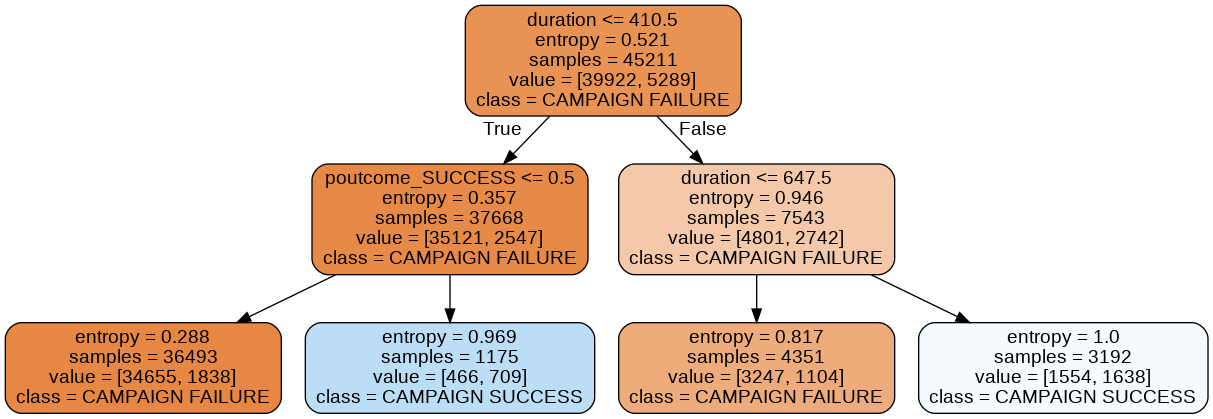

In [0]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(dummy_data.loc[:, dummy_data.columns != "y"],
                                                                       dummy_data.loc[: ,"y"],
                                                                       random_state = 42,
                                                                       train_size=0.8, 
                                                                       test_size=0.2)

models = {"DummyClassifier": {"model": DummyClassifier(random_state=42, strategy="stratified"),
                              "score":0},  
          "DecisionTree": {"model": DecisionTreeClassifier(random_state=42, criterion='entropy'),
                           "params": {"min_samples_split":[x for x in range(500, 5000, 100)], 
                                      "min_samples_leaf": [x for x in range(500, 5000, 100)], 
                                      "max_depth": [x for x in range(2, 5, 1)]},
                           "best": None,
                           "score": 0}}

for key in models.keys():
    print ("Testing now: {}".format(key))

    if key != "DummyClassifier":
        print ("with params {}".format(models[key]["params"]))
        random_search = sk.model_selection.RandomizedSearchCV(estimator=models[key]["model"], 
                                                            param_distributions=models[key]["params"], 
                                                            n_iter=3, 
                                                            cv=10,
                                                            n_jobs = -1,
                                                            verbose=2)
        random_search.fit(x_train, y_train)
        models[key]["model"] = random_search.best_estimator_
        models[key]["best"] = random_search.best_params_
    else:
        models[key]["model"].fit(x_train, y_train)

    models[key]["score"] = models[key]["model"].score(x_test, y_test)
    print ("Model {} has an accuracy of {}".format(key, models[key]["score"]))

models['DecisionTree']['model'].fit(dummy_data.loc[:,dummy_data.columns != "y"], dummy_data.loc[:,"y"])

graph = pydotplus.graph_from_dot_data(sk.tree.export_graphviz(models['DecisionTree']['model'], 
                                                              filled=True,
                                                              rounded=True,
                                                              label = "all",
                                                              feature_names =list(x_train.columns),
                                                              class_names=["CAMPAIGN FAILURE", "CAMPAIGN SUCCESS"],
                                                              leaves_parallel=False))
Image(graph.create_png())

## 2.1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

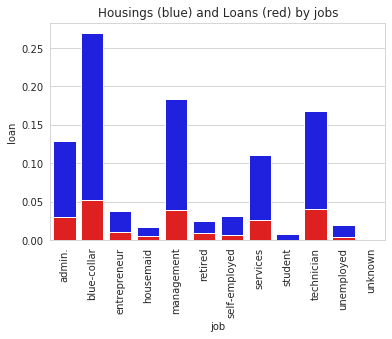

In [0]:
# Let's make a copy of data to not mess the dataset:
data_group = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')

# Let's transform yes to 1 and no to 0
data_group["housing"] = data_group["housing"].apply(lambda x: 1 if x=="yes" else 0)
data_group["loan"] = data_group["loan"].apply(lambda x: 1 if x=="yes" else 0)

# Let's check how many housings we have
total = np.sum(data_group["housing"])+np.sum(data_group["loan"])

data_group = data_group.groupby(by="job")["housing", "loan"].apply(lambda x: np.sum(x)/total).reset_index()
data_group.sort_values(by=["housing", "loan"])

sns.set_style("whitegrid")

plot = sns.barplot(x=data_group["job"],
                   y=data_group["housing"]+data_group["loan"],
                   color="blue",
                   alpha=1)

plot2 = sns.barplot(x=data_group["job"],
                   y=data_group["loan"],
                   color="red",
                   alpha = 1)

plt.xticks(rotation=90)
plot.set_title("Housings (blue) and Loans (red) by jobs")
plt.show()

Na distribuição de valores fica claro que a probabilidade de um empréstimo pertencer a um trabalhador da indústria ("blue-collar") é bem maior que as demais, e, se considerarmos somente essa classe de trabalhadores, a maior probabilidade recai sobre o empréstimo habitacional.

## 2.2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

Text(0.5, 1.0, 'Sucess in campaign vs contact number')

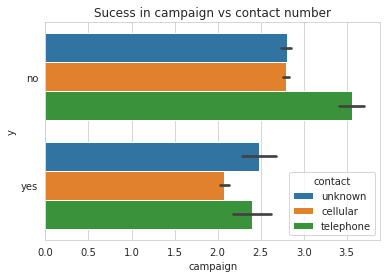

In [0]:
# Let's make a copy of data to not mess the dataset:
data_group = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')

plot = sns.barplot(x=data_group["campaign"],
                   y=data_group["y"],
                   hue=data_group["contact"],
                   dodge=True)

plot.set_title("Sucess in campaign vs contact number")

Apesar de os valroes estarem bem próximos (ainda mais se considerarmos a margem de erro) parece haver uma correlação negativa entre o sucesso da campanha e o número de contatos. Isso aparece também no rankeamento dos atributos feito no capítulo 2.

## 2.3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

In [0]:
# Let's make a copy of data to not mess the dataset:
data_group = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')

average = data_group.groupby(by=["y"])["campaign"].apply(np.mean).reset_index()
print(average)

bycontact = data_group.groupby(by=["y", "contact"])["campaign"].apply(np.mean).reset_index()
print(bycontact)

     y  campaign
0   no  2.846350
1  yes  2.141047
     y    contact  campaign
0   no   cellular  2.797520
1   no  telephone  3.556439
2   no    unknown  2.800721
3  yes   cellular  2.077592
4  yes  telephone  2.397436
5  yes    unknown  2.475472


A média do número de contatos das campanhas que obtiveram sucesso é de 2.14, se arredondarmos isso matematicamente, chegaremos ao valor ideal de 2 contatos por campanha. Da mesma forma, se arredondarmos matematicamente o número mínimo de contatos para uma campanha fracassada encontramos 3, que deve ser considerado o número máximo de ligações à serem realizadas.

## 2.4. O resultado da campanha anterior tem relevância na campanha atual?

Text(0.5, 0, '# of successfull campaigns')

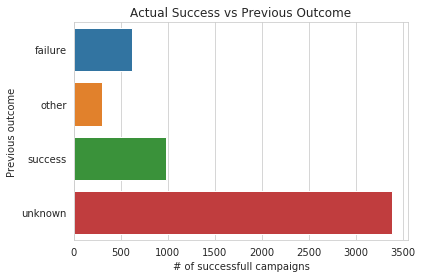

In [0]:
# Let's make a copy of data to not mess the dataset:
data_group = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')

data_group["y"] = data_group["y"].apply(lambda x: 1 if x=="yes" else 0)

data_group = data_group.groupby(by="poutcome")["y"].sum().reset_index()


plot = sns.barplot(x=data_group["y"],
                   y=data_group["poutcome"])

plot.set_title("Actual Success vs Previous Outcome")
plot.set_ylabel("Previous outcome")
plot.set_xlabel("# of successfull campaigns")


# make a decision tree and rank the features;

Sim. Isso fica evidente através do gráfico acima, do gráfico da árvore de decisão e do rankeamento de atributos feitos no capítulo 2.

## 2.5. Qual o fator determinante para que o banco exija um seguro de crédito?

Para responder essa pergunta, vamos rodar o mesmo código do capítulo 2, mas antes disso vamos balancear as classes do atributo 'default':

In [171]:
data = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')
data["default"] = data["default"].apply(lambda x: 1 if x=="yes" else 0)
processor = PreProcessor(data = data)
processor.TextHandler()
dummy_data = processor.Dummify()

majority = dummy_data.loc[dummy_data["default"]==0,:]
minority = dummy_data.loc[dummy_data["default"]==1,:]

minority_upsampled = resample(minority, 
                              replace=True,     
                              n_samples=44396,    
                              random_state=42)

dummy_data = pd.concat([majority, minority_upsampled])
dummy_data["default"].value_counts()

1    44396
0    44396
Name: default, dtype: int64

In [172]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rfe = RFE(model)
x_rfe = rfe.fit_transform(dummy_data.loc[:, dummy_data.columns != "default"], 
                          dummy_data.loc[: ,"default"])

Ranking = pd.DataFrame(columns=["Feature", "Ranking", "Consider?"])
Ranking["Feature"] = dummy_data.loc[:, dummy_data.columns != "default"].columns
Ranking["Ranking"] = rfe.ranking_
Ranking["Consider?"] = rfe.support_
Ranking = Ranking.sort_values(by="Ranking")
Ranking

,Feature,Ranking,Consider?
0,age,1,True
22,marital_SINGLE,1,True
24,education_PRIMARY,1,True
25,education_SECONDARY,1,True
26,education_TERTIARY,1,True
58,y_YES,1,True
30,housing_YES,1,True
21,marital_MARRIED,1,True
32,loan_NO,1,True
35,contact_CELLULAR,1,True


Testing now: DummyClassifier
Model DummyClassifier has an accuracy of 0.5052649360887438
Testing now: DecisionTree
with params {'min_samples_split': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900], 'min_samples_leaf': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900], 'max_depth': [2, 3]}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.9s finished


Model DecisionTree has an accuracy of 0.8047750436398445


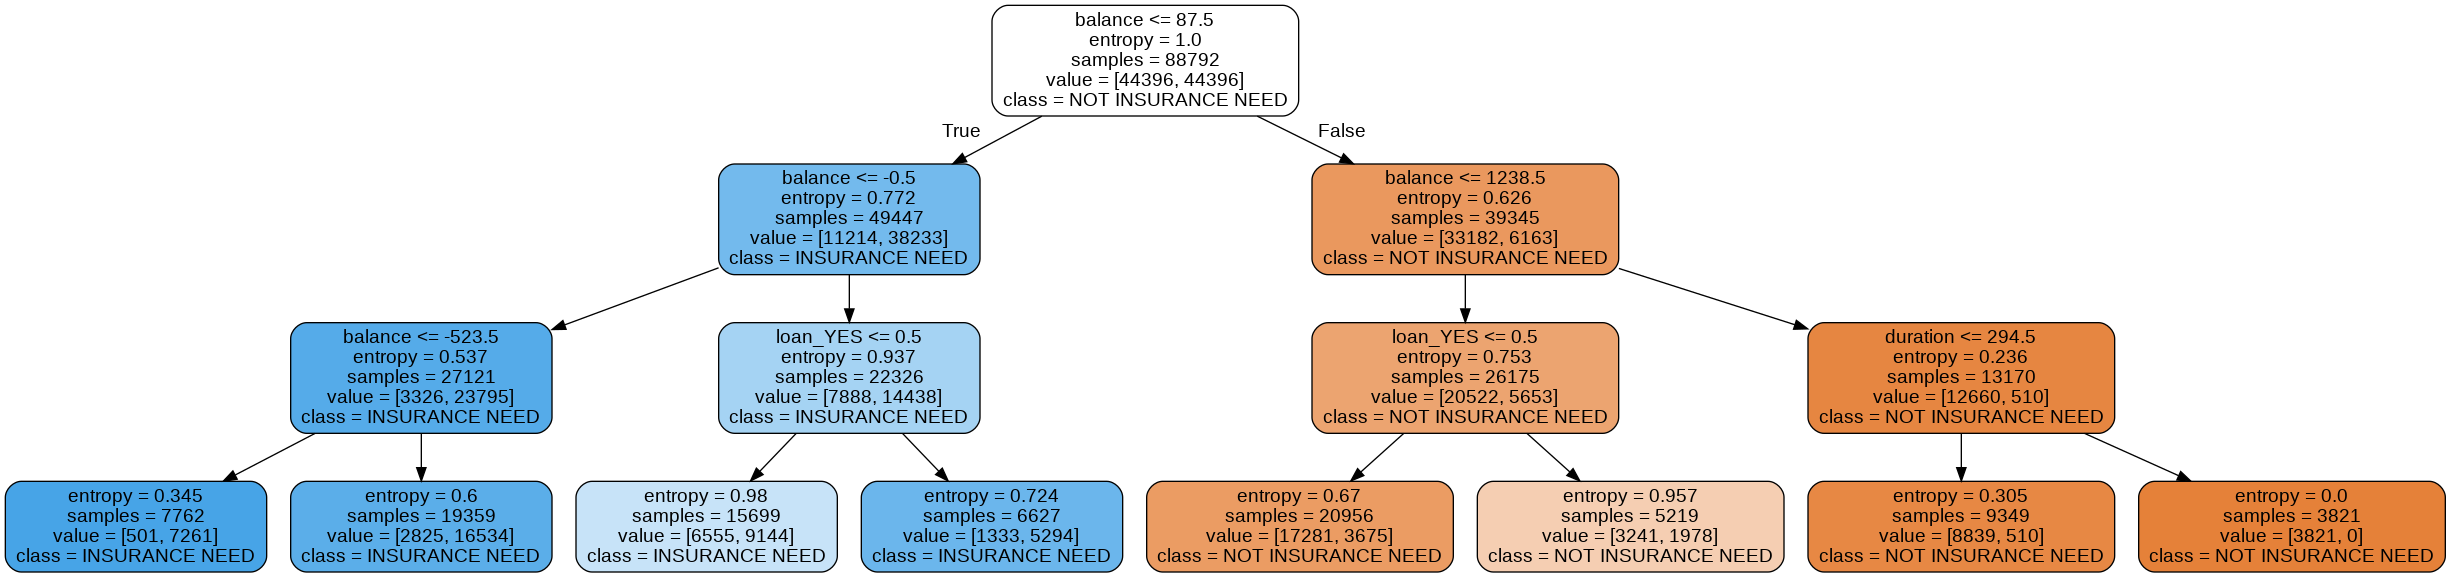

In [173]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(dummy_data.loc[:, dummy_data.columns != "default"],
                                                                       dummy_data.loc[: ,"default"],
                                                                       random_state = 42,
                                                                       train_size=0.8, 
                                                                       test_size=0.2)

models = {"DummyClassifier": {"model": DummyClassifier(random_state=42, strategy="stratified"),
                              "score":0},  
          "DecisionTree": {"model": DecisionTreeClassifier(random_state=42, criterion='entropy'),
                           "params": {"min_samples_split":[x for x in range(500, 5000, 100)], 
                                      "min_samples_leaf": [x for x in range(500, 5000, 100)], 
                                      "max_depth": [x for x in range(2, 4, 1)]},
                           "best": None,
                           "score": 0}}

for key in models.keys():
    print ("Testing now: {}".format(key))

    if key != "DummyClassifier":
        print ("with params {}".format(models[key]["params"]))
        random_search = sk.model_selection.RandomizedSearchCV(estimator=models[key]["model"], 
                                                            param_distributions=models[key]["params"], 
                                                            n_iter=3, 
                                                            cv=10,
                                                            n_jobs = -1,
                                                            verbose=2)
        random_search.fit(x_train, y_train)
        models[key]["model"] = random_search.best_estimator_
        models[key]["best"] = random_search.best_params_
    else:
        models[key]["model"].fit(x_train, y_train)

    models[key]["score"] = models[key]["model"].score(x_test, y_test)
    print ("Model {} has an accuracy of {}".format(key, models[key]["score"]))


models['DecisionTree']['model'].fit(dummy_data.loc[:,dummy_data.columns != "default"], dummy_data.loc[:,"default"])

graph = pydotplus.graph_from_dot_data(sk.tree.export_graphviz(models['DecisionTree']['model'], 
                                                              filled=True,
                                                              rounded=True,
                                                              label = "all",
                                                              feature_names =list(x_train.columns),
                                                              class_names=["NOT INSURANCE NEED", "INSURANCE NEED"],
                                                              leaves_parallel=False))
Image(graph.create_png())

Sem dúvida esse atributo seria o balanço anual. Mas podemos adicionar aqui também a presença de um empréstimo pessoal.

## 2.6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

Para essa análise vamos usar um pacote chamado Pandas-profiling. Ele gera um relatório HTML que será disponibilizado na pasta 'reports':

In [196]:
data = pd.read_csv(path_to_root+'/data/bank-full.csv', sep=';')
data = data.loc[data["housing"]=="yes", :]

pandas_profiling.ProfileReport(df=data).to_file(path_to_root+'/reports/profiling.html')

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Bom, os dados mais proeminentes das pessoas com empréstimo imobiliário são:


1. Status conjugal - 61% são casados
2. Escolaridade - 55.9% tem apenas o secundário
3. Débitos (default) - 98,3% daqueles que possuem empréstimo falham em cumprir suas obrigações legais
4. Empréstimo pessoal - 82,6% não possuem empréstimos pessoais

Outras informações não tão proeminentes
5. Idade - em média 39,17 anos
6. Emprego - Em sua maioria, blue-collars (28%)
7. Balanço médio $1175.1 Euros


